In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import vapeplot 
from scipy import interp
import scipy.stats
import warnings
from collections import OrderedDict
warnings.simplefilter("ignore")
%matplotlib inline

from datetime import datetime
def timestamp(): return datetime.today().strftime('%Y%m%d')

In [2]:
E=5
df = pd.read_csv("deepbake_s11.week{}_preditions.txt".format(E),sep="\t")
df.head(20)

,season,baker,episode,place,tech_mean,tech,mean_star,star,mean_good,good,mean_bad,bad,preds,bottom,finalist,top3,fifthseventh,thirdforth
0,11,Dave,5,0,0.903226,0.727273,1.0,0.0,1.000000,1.0,0.444444,0.0,1,6.93,22.25,66.91,11.36,14.80
1,11,Hermine,5,0,0.500000,0.454545,0.0,0.0,1.000000,1.0,0.000000,0.0,1,7.14,26.91,63.15,13.30,16.41
2,11,Laura,5,0,0.698413,0.818182,1.0,1.0,0.455556,1.0,0.000000,0.0,1,3.21,24.08,53.41,24.12,19.26
3,11,Linda,5,0,0.649123,1.000000,0.0,0.0,0.000000,0.0,1.000000,1.0,3,6.72,0.19,1.80,70.84,20.65
4,11,Loriea,5,1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.444444,0.0,4,70.71,3.28,6.64,14.00,8.65
5,11,Lottie,5,0,0.829060,0.636364,0.0,0.0,0.000000,0.0,0.444444,0.0,3,31.23,1.21,5.13,47.20,16.44
6,11,Mak,5,2,0.043478,0.000000,0.0,0.0,0.000000,0.0,0.444444,0.0,4,72.80,2.92,5.95,13.24,8.01
7,11,Marc,5,0,1.000000,0.909091,1.0,0.0,1.000000,0.0,1.000000,1.0,3,11.19,1.58,30.48,31.30,27.03
8,11,Mark,5,0,0.200364,0.545455,1.0,0.0,1.000000,0.0,0.444444,1.0,1,4.84,7.11,60.39,15.59,19.17
9,11,Peter,5,0,0.301587,0.363636,1.0,0.0,1.000000,0.0,0.444444,0.0,1,23.51,14.87,50.86,13.19,12.44


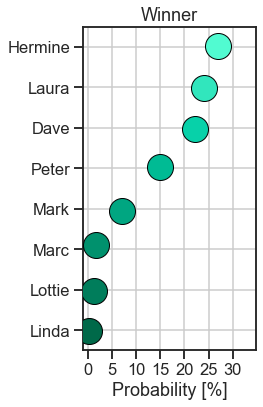

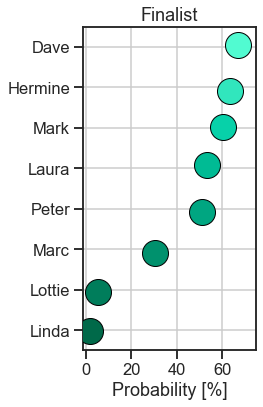

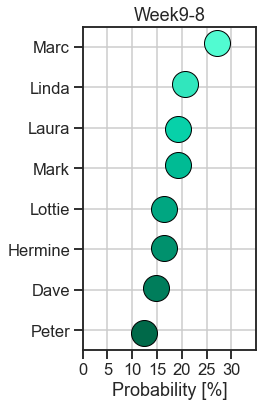

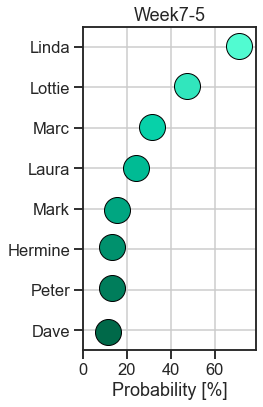

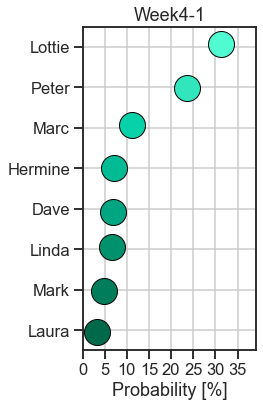

In [3]:
pred = ['finalist','top3','thirdforth','fifthseventh','bottom']
labs = ['Winner','Finalist','Week9-8','Week7-5','Week4-1']
losers = ['Loriea','Mak','Rowan','Sura']
pal=['#002100', '#003217', '#004328', '#005638', '#006949', '#007d5b', '#00916d', '#00a681', '#00bb94', '#07d1a9', '#31e6bd', '#51fbd1']
pal=list(reversed(pal))
for i,p in enumerate(pred):
        sns.set_style("ticks")
        sns.set_context("talk")
        f, ax = plt.subplots(1,1,figsize=(4,6))
        sns.stripplot(
            x=p,
            y='baker',
            data=df.loc[~df['baker'].isin(losers)].sort_values(p,ascending=False),
            size=26,
            palette=pal,
            edgecolor='k',
            linewidth=1,
        )
        ax.yaxis.grid() # horizontal lines
        ax.xaxis.grid()
        xmax = max(df.loc[~df['baker'].isin(losers)][p]+3)
        ax.set_xlim(xmax=xmax+5)
        buf=5 
        if xmax+5 > 40: buf = 20
        ax.set_xticks([x for x in range(0,int(xmax+5),buf)])
        ax.set_xlabel('Probability [%]')
        ax.set_ylabel('')
        ax.set_title(labs[i])
        f.tight_layout()
        f.savefig("../../fig/s11e{}_{}.png".format(E,p),dpi=300)

In [4]:
df = pd.concat(
    [
        pd.read_csv("deepbake_s11.week5_preditions.txt",sep='\t'),
        pd.read_csv("deepbake_s11.week4_preditions.txt",sep='\t'),
        pd.read_csv("deepbake_s11.week3_preditions.txt",sep='\t'),
        pd.read_csv("deepbake_s11.week2_preditions.txt",sep='\t'),
        pd.read_csv("deepbake_s11.week1_preditions.txt",sep='\t'),
    ]
)
df.head(12)

,season,baker,episode,place,tech_mean,tech,mean_star,star,mean_good,good,mean_bad,bad,preds,bottom,finalist,top3,fifthseventh,thirdforth
0,11,Dave,5,0,0.903226,0.727273,1.0,0.0,1.000000,1.0,0.444444,0.0,1,6.93,22.25,66.91,11.36,14.80
1,11,Hermine,5,0,0.500000,0.454545,0.0,0.0,1.000000,1.0,0.000000,0.0,1,7.14,26.91,63.15,13.30,16.41
2,11,Laura,5,0,0.698413,0.818182,1.0,1.0,0.455556,1.0,0.000000,0.0,1,3.21,24.08,53.41,24.12,19.26
3,11,Linda,5,0,0.649123,1.000000,0.0,0.0,0.000000,0.0,1.000000,1.0,3,6.72,0.19,1.80,70.84,20.65
4,11,Loriea,5,1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.444444,0.0,4,70.71,3.28,6.64,14.00,8.65
5,11,Lottie,5,0,0.829060,0.636364,0.0,0.0,0.000000,0.0,0.444444,0.0,3,31.23,1.21,5.13,47.20,16.44
6,11,Mak,5,2,0.043478,0.000000,0.0,0.0,0.000000,0.0,0.444444,0.0,4,72.80,2.92,5.95,13.24,8.01
7,11,Marc,5,0,1.000000,0.909091,1.0,0.0,1.000000,0.0,1.000000,1.0,3,11.19,1.58,30.48,31.30,27.03
8,11,Mark,5,0,0.200364,0.545455,1.0,0.0,1.000000,0.0,0.444444,1.0,1,4.84,7.11,60.39,15.59,19.17
9,11,Peter,5,0,0.301587,0.363636,1.0,0.0,1.000000,0.0,0.444444,0.0,1,23.51,14.87,50.86,13.19,12.44


In [8]:
def plot_gbbo_probs(df,prob,ax,colr,lab,place):
    sns.set_style("white")
    shp = ['o','s','^']
    for i,baker in enumerate(colr):    
    
        tmp = df.loc[df['baker']==baker]
        alpha,lwd=0.3,0,
        if baker in place[prob]: alpha,lwd=1.0,2
        ax.scatter(
            x=tmp['week'],
            y=tmp[prob],
            color=colr[baker],
            s=250,
            zorder=5,
            label=baker,
            linewidth=lwd,
            edgecolor='#1c1c1c',
            alpha=alpha,
            marker=shp[i%3],
        )
        
        ax.plot(
            tmp['week'],
            tmp[prob],
            color=colr[baker],
            linewidth=4,
            zorder=4,
            label='',
            alpha=alpha
        )
        if alpha==1:
            ax.plot(
                tmp['week'],
                tmp[prob],
                color='#1c1c1c',
                linewidth=7,
                zorder=1,
                label='',
            )

        
    buff=0.5
    ax.legend()
    vapeplot.despine(ax)
    ax.set_ylabel(lab)
    ax.set_xlabel("Week")
    ax.set_xticks(list(range(1,max(df['week'])+1)))
    ax.set_xlim(0,max(df['week'])+buff)
    ax.yaxis.grid()
    ax.xaxis.grid()

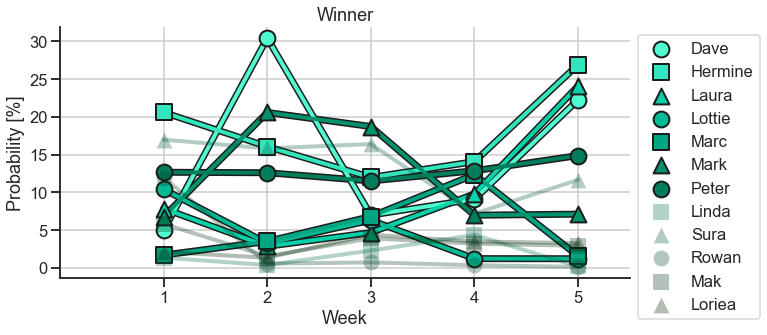

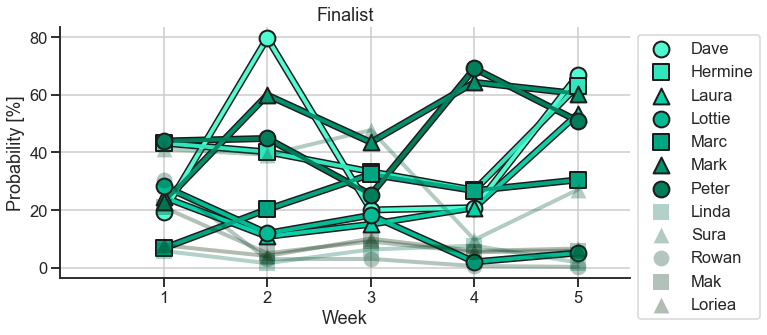

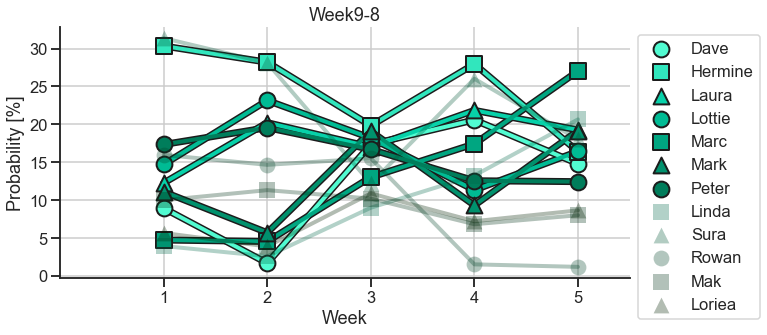

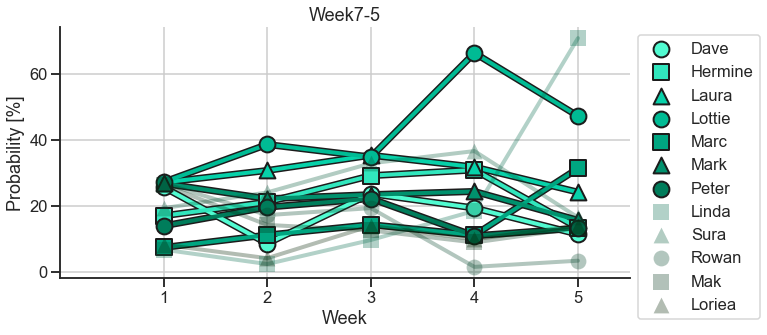

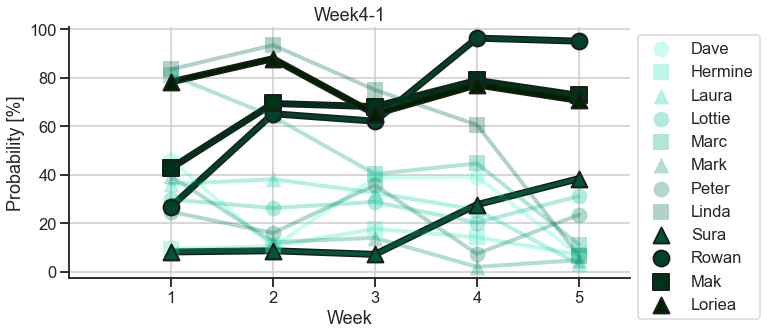

In [9]:
col=['#002100', '#003217', '#004328', '#005638', '#006949', '#007d5b', '#00916d', '#00a681', '#00bb94', '#07d1a9', '#31e6bd', '#51fbd1']
colrs=list(reversed(col))
gbbo=df
ordr = ['Dave','Hermine','Laura','Lottie','Marc','Mark','Peter','Linda','Sura','Rowan','Mak','Loriea']
ordr_ind = dict(zip(ordr, range(len(ordr))))
gbbo['place'] = df['baker'].map(ordr_ind)

still_in = ['Dave','Hermine','Laura','Lottie','Marc','Mark','Peter']
place = {
    'finalist' : still_in,
    'top3' : still_in,
    'thirdforth' : still_in,
    'fifthseventh' : still_in,
    'bottom' : ['Loriea','Mak','Rowan','Sura']
}

TITL = ['Winner','Finalist','Week9-8','Week7-5','Week4-1']
gbbo['week']=gbbo['episode']
gbbo = gbbo.sort_values(ascending=True,by=['week','place'])
tmp = gbbo.loc[gbbo['week']==max(gbbo['week'])]
bakers = tmp['baker']
colr_dict=OrderedDict()
for x,c in zip(bakers,colrs):
    colr_dict[x]=c

for i,k in enumerate(place):
    sns.set_context("talk")
    f,ax = plt.subplots(1,1,figsize=(11,5))
    plot_gbbo_probs(gbbo,k,ax,colr_dict,'Probability [%]',place)
    ax.set_title(TITL[i])
    ax.legend(bbox_to_anchor=(1., 1.))
    f.tight_layout()
    f.savefig("../../fig/s11_{}.png".format(k),dpi=300)